<a href="https://colab.research.google.com/github/jaewoong-87/machine-learning/blob/main/XGBoost%2C_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XGBoost

In [ ]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

XGBoost based on python 

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {
    'max_depth':3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric':'logloss',
    'ealry_stopping':100
}
num_rounds=400

In [ ]:
import numpy as np
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=evals)

[0]	train-logloss:0.609436	eval-logloss:0.610101
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540471	eval-logloss:0.540739
[2]	train-logloss:0.482113	eval-logloss:0.484899
[3]	train-logloss:0.433653	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.353717	eval-logloss:0.362107
[6]	train-logloss:0.322225	eval-logloss:0.329962
[7]	train-logloss:0.292921	eval-logloss:0.301791
[8]	train-logloss:0.267306	eval-logloss:0.278011
[9]	train-logloss:0.244087	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.240372
[11]	train-logloss:0.208073	eval-logloss:0.222709
[12]	train-logloss:0.191772	eval-logloss:0.207948
[13]	train-logloss:0.17746	eval-logloss:0.195312
[14]	train-logloss:0.164082	eval-logloss:0.184597
[15]	train-logloss:0.152497	eval-logloss:0.171834
[16]	train-logloss:0.141981	eval-logloss:0.161516
[17]	train-loglo

In [ ]:

predicts = xgb_model.predict(dtest)
print(predicts[:10])
print(np.round(predicts[:10], 3))

[9.9955374e-01 9.9917752e-01 8.6196855e-04 9.9485481e-01 5.4615230e-04
 9.8911756e-01 9.9485010e-01 9.9818277e-01 9.6617907e-01 7.9452908e-01]
[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [ ]:
preds = [1 if x >0.5 else 0 for x in predicts]
print(preds[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [ ]:
print('accuracy:{}'.format(accuracy_score(y_test, preds)))
print('precision:{}'.format(precision_score(y_test, preds)))
print('recall:{}'.format(recall_score(y_test, preds)))

accuracy:0.9736842105263158
precision:0.972972972972973
recall:0.9863013698630136


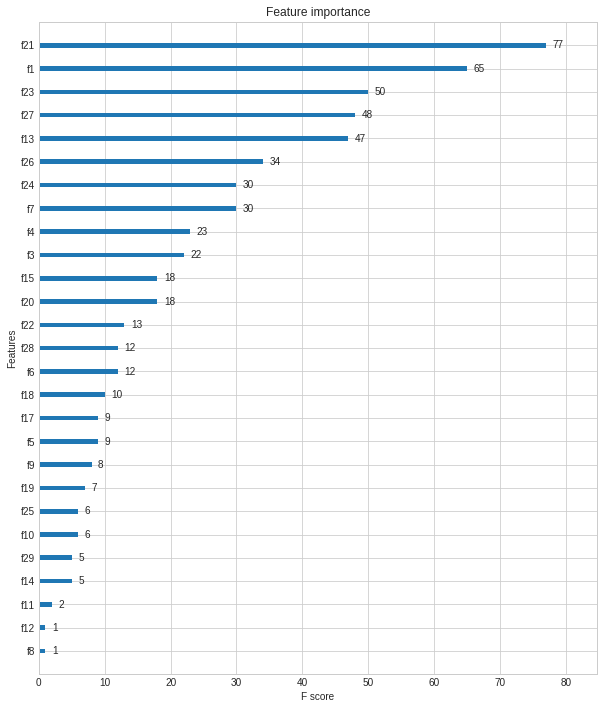

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax);

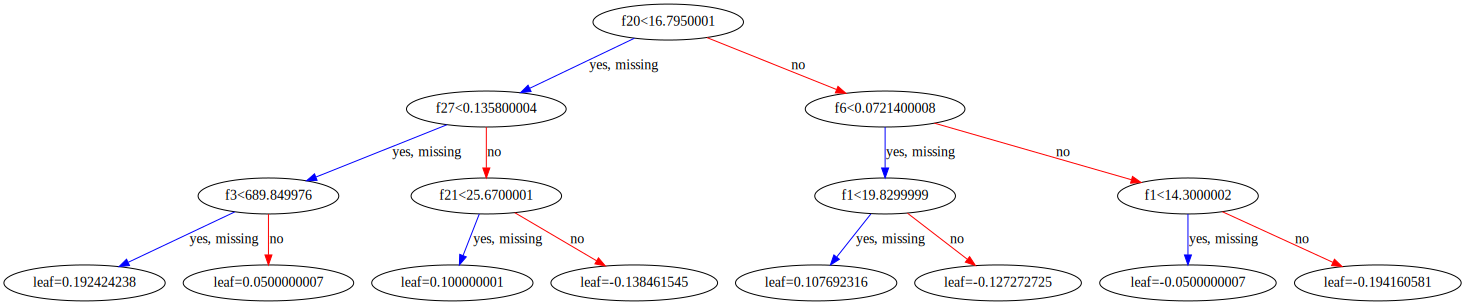

In [ ]:
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

XGBClassifier

In [ ]:
iris =load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [ ]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:,1]

In [ ]:
cross_val = cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time:{} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time:{} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.054863691329956055 (+/- 0.003288784050384645
avg score time:0.0010419845581054687 (+/- 4.510728297209098e-05
avg test time:0.96 (+/- 0.024944382578492935


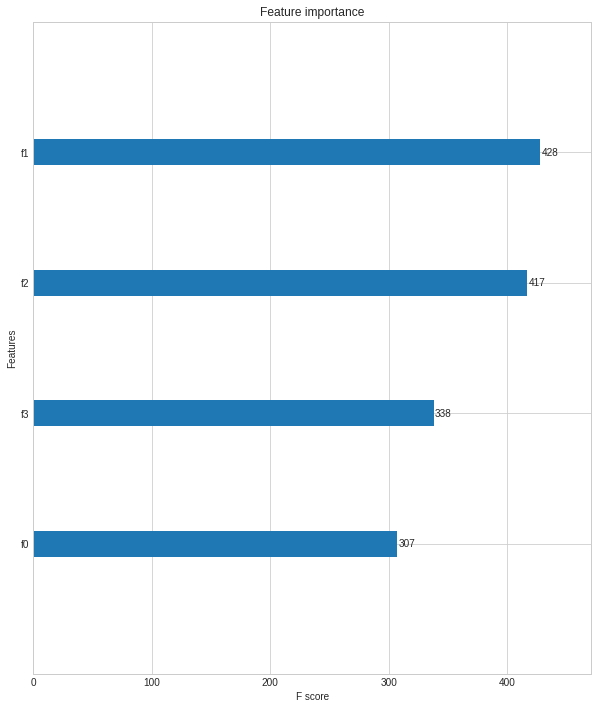

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax);

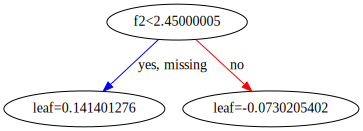

In [ ]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

XGBregression

In [ ]:
boston =load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

In [ ]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [ ]:
cross_val = cross_validate(
    estimator=xgbr,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time:{} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time:{} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.15693936347961426 (+/- 0.004053311516021584
avg score time:0.0023412227630615233 (+/- 0.00013835752045631862
avg test time:0.6884390572208088 (+/- 0.164997474845101


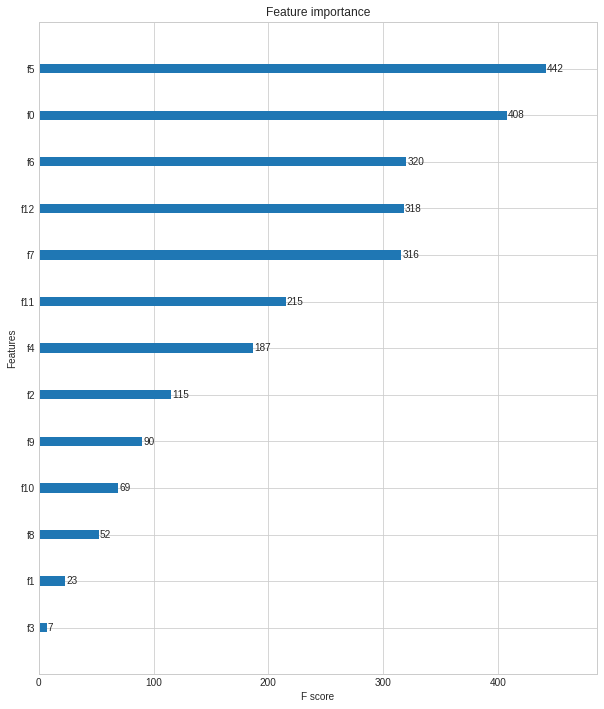

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbr, ax=ax);

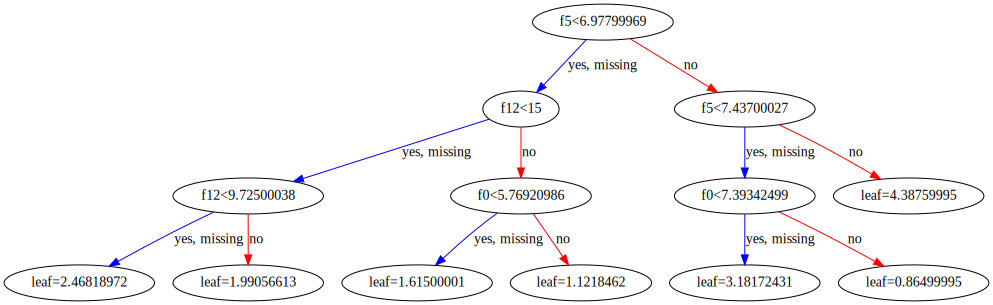

In [ ]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

LightGBM  - fast learning time, use less memory and auto covert

In [ ]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [ ]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	va

In [ ]:
cross_val = cross_validate(
    estimator=xgbr,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time:{} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time:{} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.05941925048828125 (+/- 0.003141992163585938
avg score time:0.0014386177062988281 (+/- 6.0939154524628804e-05
avg test time:0.9533333333333335 (+/- 0.06182412330330468


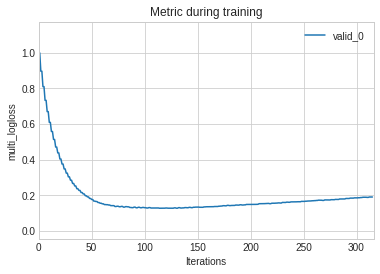

In [ ]:
plot_metric(lgbmc);

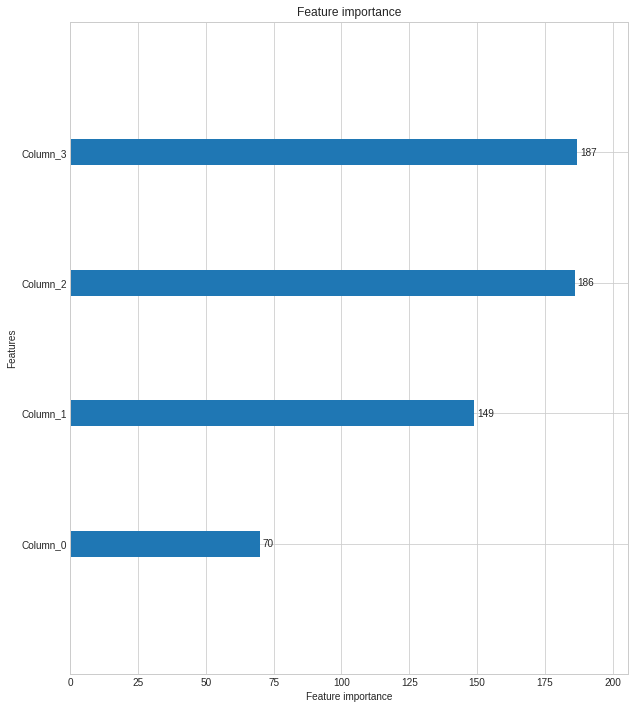

In [ ]:
plot_importance(lgbmc, figsize=(10,12));

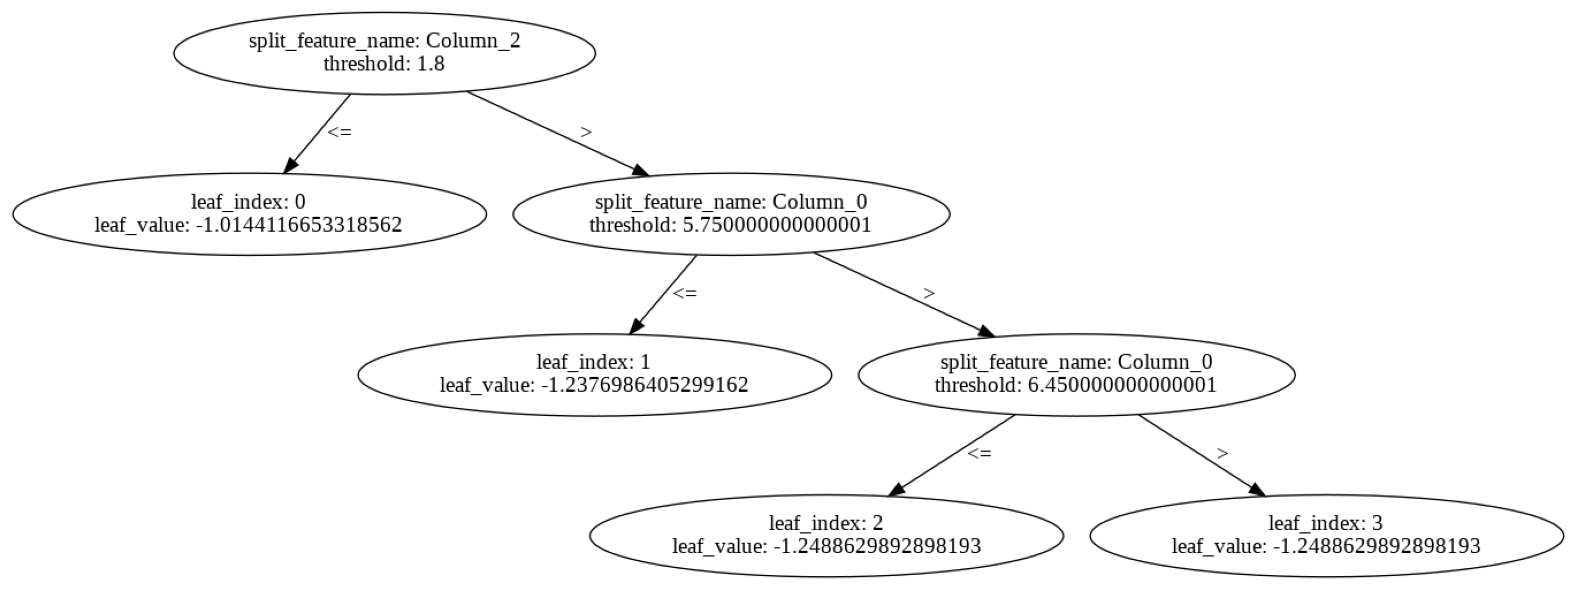

In [ ]:
plot_tree(lgbmc, figsize=(28,24));

LGBMRegressor

In [ ]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

In [ ]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	va

In [ ]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time:{} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time:{} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.1836380958557129 (+/- 0.0072869702354429015
avg score time:0.0041522979736328125 (+/- 0.0005606112232821583
avg test time:0.5692468252571979 (+/- 0.2956636613238221


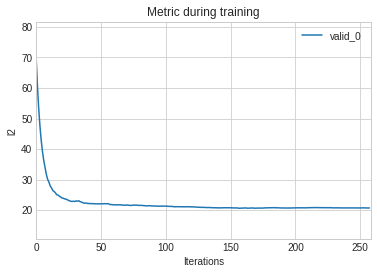

In [ ]:
plot_metric(lgbmr);

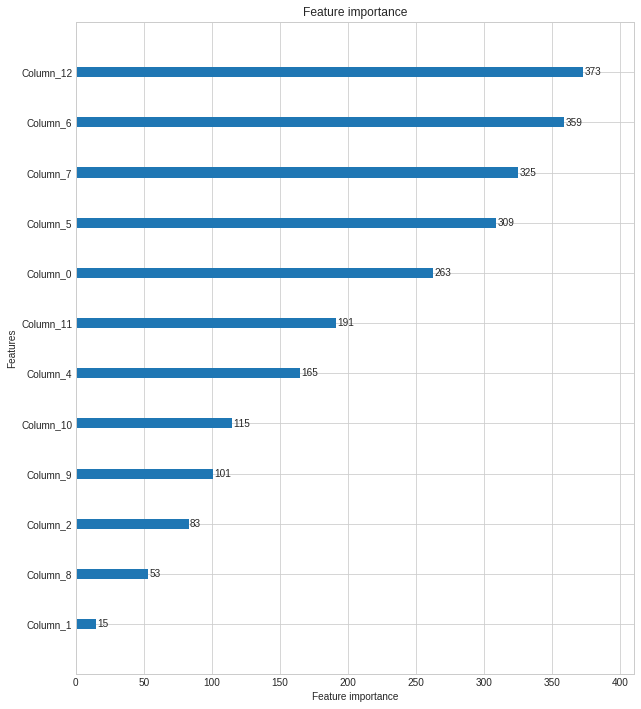

In [ ]:
plot_importance(lgbmr, figsize=(10,12));

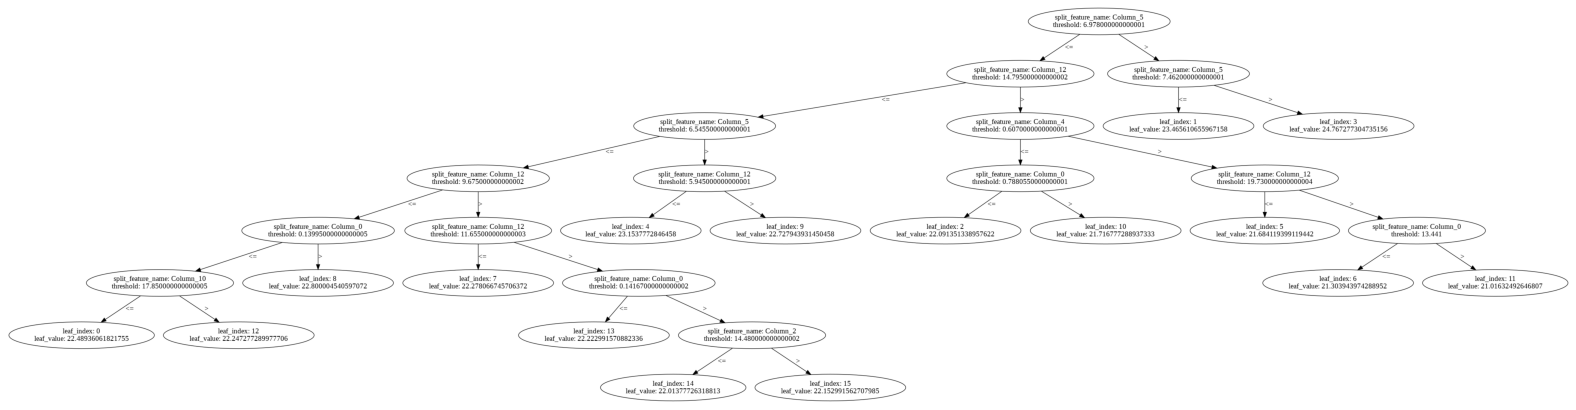

In [ ]:
plot_tree(lgbmr, figsize=(28,24));